# Getting starting with Omnipath

This document illustrates some simple path searches using Omnipath (https://omnipathdb.org/), using the OmnipathR library (https://github.com/saezlab/OmnipathR). Note that to get this working independently (i.e. outside of the course) you will need to install igraph through conda before attempting to install omnipath, using the command below

`conda install igraph`

## First steps

The first two cells below install the OmnipathR library from the bioconductor package manager, and then load both the omnipathR library and the igraph library for use.

In [8]:
if (!requireNamespace('BiocManager', quietly = TRUE))
    install.packages('BiocManager')

## Last release in Bioconductor
BiocManager::install('OmnipathR', version = '3.18')


'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'OmnipathR'”
Old packages: 'digest', 'MASS'



In [1]:
library('OmnipathR')
library('igraph')


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




## Searching Omnipath

Next we are going to load some interactions from Omnipath. Omnipath acts as a "database of databases", and so depending on wht you're looking for you can pick databases best suited to your projects needs. Here we start with the SignaLink3, Phosphosite, and SIGNOR datasets to search for paths between APC and BMPR1B.

We first load the edges into the "interactions" object in memory. Then, to allow us to search paths we convert the interactions into a graph object (OPI_g). Finally, we search for and print one of the shortest paths in this graph  between our genes of interest.

In [2]:
interactions <- import_omnipath_interactions(
    resources = c('SignaLink3', 'PhosphoSite', 'SIGNOR')
)
OPI_g = interaction_graph(interactions = interactions)

path = shortest_paths(OPI_g,from = 'APC',to = 'BMPR1B',
    output = 'epath')$epath[[1]]

print_path_es(path ,OPI_g)

source,interaction,target,n_resources,n_references
<chr>,<chr>,<chr>,<int>,<int>
APC (P25054),==(+/-)==>,CTNNB1 (P35222),12,39
CTNNB1 (P35222),==( + )==>,SMAD7 (O15105),4,4
SMAD7 (O15105),==( + )==>,BMPR1B (O00238),2,3


Helpfully, we can convert this path into a BMA object with built in commands. The text below can be copy/pasted into the BMA user interface to get this graph

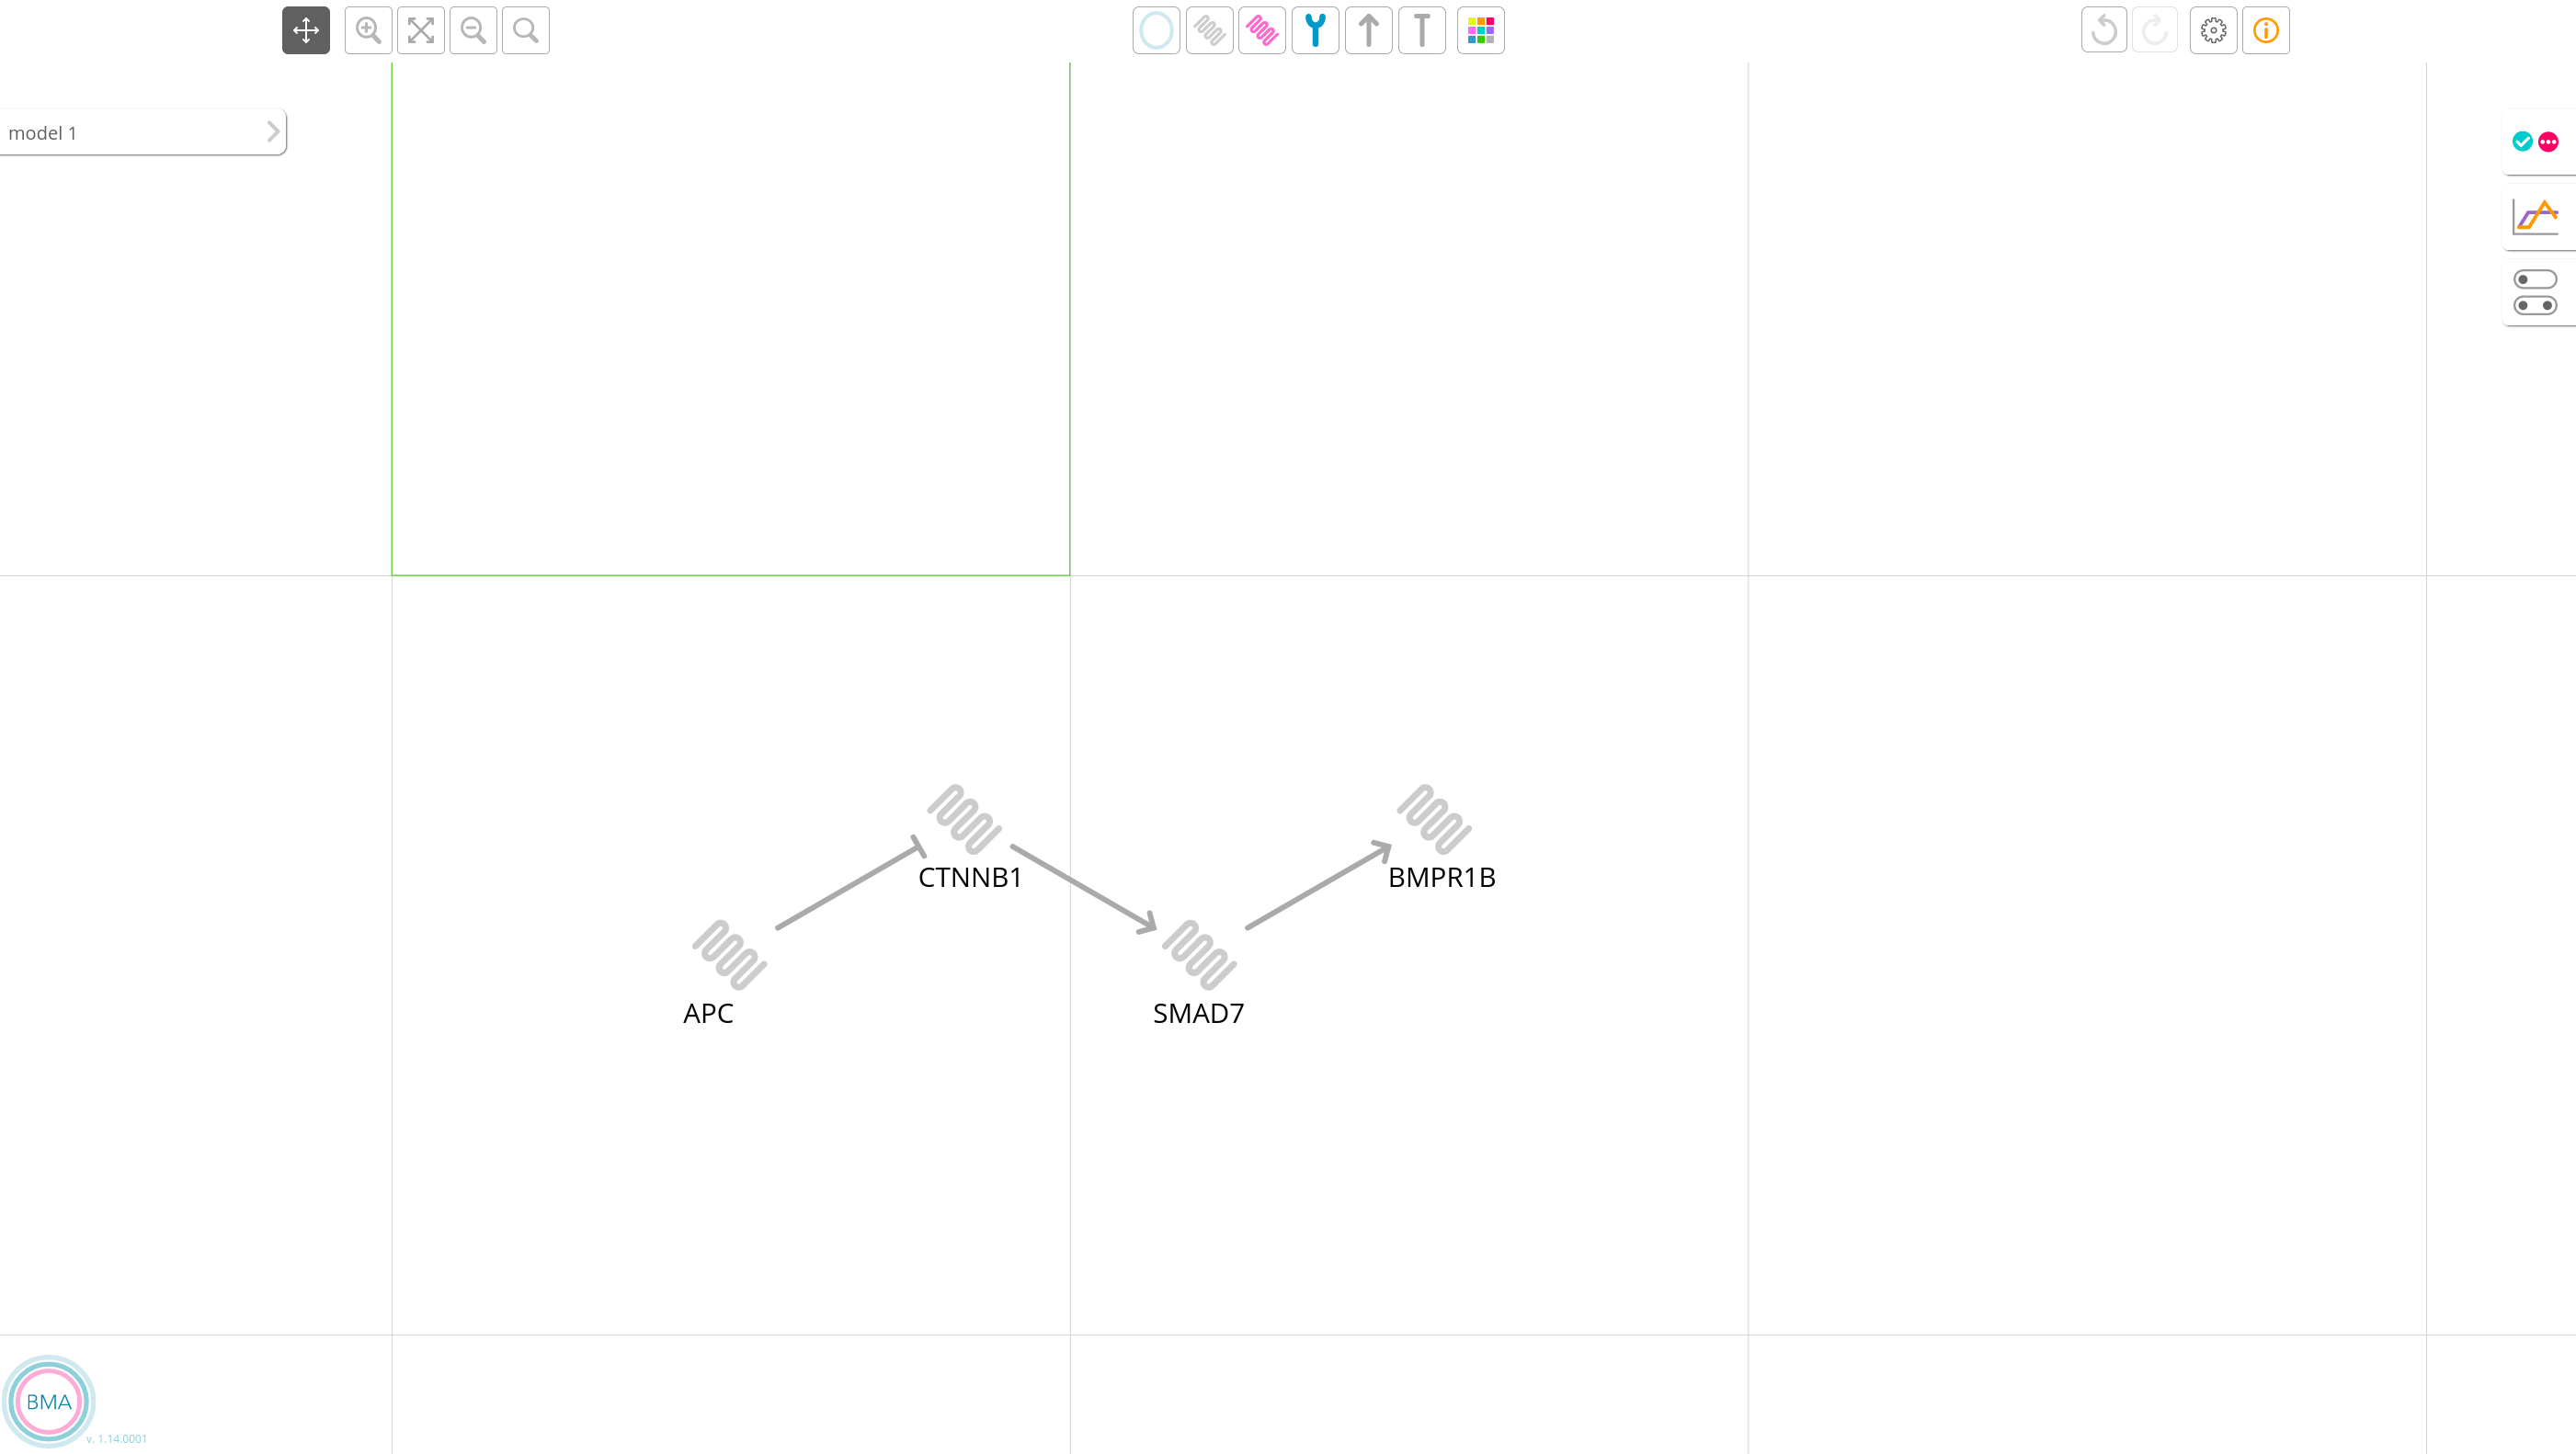

In [3]:
print_bma_motif_es(path,OPI_g)

{"Model": {"Name": "Omnipath motif", "Variables":[{"Name":"APC", "Id":1, "RangeFrom":0, "RangeTo":2, "Formula":""}, {"Name":"CTNNB1", "Id":2, "RangeFrom":0, "RangeTo":2, "Formula":"2-var(APC)"}, {"Name":"SMAD7", "Id":3, "RangeFrom":0, "RangeTo":2, "Formula":""}, {"Name":"BMPR1B", "Id":4, "RangeFrom":0, "RangeTo":2, "Formula":""}], "Relationships":[{"Id":5, "FromVariable":1, "ToVariable":2, "Type":"Inhibitor"}, {"Id":6, "FromVariable":2, "ToVariable":3, "Type":"Activator"}, {"Id":7, "FromVariable":3, "ToVariable":4, "Type":"Activator"}]}, "Layout":{"Variables":[{"Id":1, "Name":"APC", "Type":"Constant", "ContainerId":0, "PositionX":125.000000, "PositionY":140.000000, "CellX":0, "CellY":0, "Angle":0, "Description":""}, {"Id":2, "Name":"CTNNB1", "Type":"Constant", "ContainerId":0, "PositionX":211.602540, "PositionY":90.000000, "CellX":0, "CellY":0, "Angle":0, "Description":"Mixed-PMID:BioGRID:10545404, BioGRID:11533658, BioGRID:21664290, CancerCellMap:9065403, HPRD:11166179, HPRD:12000790,

## Multiple paths

Whilst the shortest paths command reveals one path, it may be important to consider alternative paths of the same length, particularly if one gene is not available in thee system of interest (for example, if its not expressed). You can look at this with the "all_shortest_paths" command. If we test it with APC and BMPR1B we find there is only a single link. To illustrate the function, searching for links between APC and TP53 we find two paths.

In [4]:
print_path_vs(all_shortest_paths(OPI_g,from = 'APC',to = 'BMPR1B')$res,OPI_g)

Pathway 1: APC -> CTNNB1 -> SMAD7 -> BMPR1B



In [7]:
print_path_vs(all_shortest_paths(OPI_g,from = 'APC',to = 'TP53')$res,OPI_g)

Pathway 1: APC -> CTNNB1 -> EP300 -> TP53

Pathway 2: APC -> CTNNB1 -> CREBBP -> TP53



## Failing to find paths

When searching for paths between genes you will frequently find they are disconnected. This might be because the entity doesn't exist in the database- such as the microRNA found to be differentially expressed. More commonly though there will be no chain of links between genes that would allow you to complete the path. 

In this situation you have a number of options. The most straightforward is to add extra databases, or as shown below search them all for links. Whilst this can work, and may be the most sensible way forward for some paths, it isn't usually a good place to start the search. It increases the complexity of the database in terms of sources, and as such increases the likelihood that you mix databases that are not appropriate to mix. 

For the purpose of this tutorial we first test for paths between APC and C3 based on our initial three databases, finding no paths. We then downlaod the interactions data from the complete database and repeat the search.

In [5]:
print_path_es(shortest_paths(OPI_g,from = 'APC',to = 'C3',
    output = 'epath')$epath[[1]],OPI_g)

Warning message in shortest_paths(OPI_g, from = "APC", to = "C3", output = "epath"):
“At vendor/cigraph/src/paths/unweighted.c:444 : Couldn't reach some vertices.”
Empty path



NULL

In [6]:
interactions <- import_omnipath_interactions()
OPI_g = interaction_graph(interactions = interactions)
print_path_es(shortest_paths(OPI_g,from = 'APC',to = 'C3',output = 'epath')$epath[[1]],OPI_g)

source,interaction,target,n_resources,n_references
<chr>,<chr>,<chr>,<int>,<int>
APC (P25054),==(+/-)==>,CTNNB1 (P35222),12,39
CTNNB1 (P35222),==(+/-)==>,CREBBP (Q92793),6,6
CREBBP (Q92793),==( + )==>,JUN (P05412),6,10
JUN (P05412),==( + )==>,SPI1 (P17947),3,3
SPI1 (P17947),==( ? )==>,CTSG (P08311),1,1
CTSG (P08311),==( + )==>,C3 (P01024),4,2


In [ ]:
## Tutorial notes

Use omnipath to propose links between APC and genes found 